In [1]:
%matplotlib notebook
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import neighbors
import sklearn.metrics

In [2]:
os.chdir("E:\latihan") #lokasi folder dimana terdapat file yang akan di load


## Data Engineering and Analytics

In [3]:
# Load the dataset

data = pd.read_table('fruit_data_with_colors.txt')  # apabila csv file ---> pd.read_csv ; excel file ---> pd.read_excel

In [4]:
# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x) # format 2 angka decimal

In [5]:
# Explore the data
 
data.head(10)  # menampilkan 10 baris pertama pada dataset

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.40,7.30,0.55
1,1,apple,granny_smith,180,8.00,6.80,0.59
2,1,apple,granny_smith,176,7.40,7.20,0.60
3,2,mandarin,mandarin,86,6.20,4.70,0.80
4,2,mandarin,mandarin,84,6.00,4.60,0.79
5,2,mandarin,mandarin,80,5.80,4.30,0.77
6,2,mandarin,mandarin,80,5.90,4.30,0.81
7,2,mandarin,mandarin,76,5.80,4.00,0.81
8,1,apple,braeburn,178,7.10,7.80,0.92
9,1,apple,braeburn,172,7.40,7.00,0.89


In [6]:
# membuat dictionary key pair value
lookup_fruit_name = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [7]:
# Mengecek ada berapa banyak NaN pada setiap coloumn

data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [8]:
# Membuang baris yang di salah satu kolomnya terdapat NaN (null coloumn)

data_clean = data.dropna()

data_clean.dtypes
data_clean.describe()

,fruit_label,mass,width,height,color_score
count,59.00,59.00,59.00,59.00,59.00
mean,2.54,163.12,7.11,7.69,0.76
std,1.21,55.02,0.82,1.36,0.08
min,1.00,76.00,5.80,4.00,0.55
25%,1.00,140.00,6.60,7.20,0.72
50%,3.00,158.00,7.20,7.60,0.75
75%,4.00,177.00,7.50,8.20,0.81
max,4.00,362.00,9.60,10.50,0.93


In [9]:
data_clean.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

## Modeling and Prediction

In [10]:
# Chek kolom apa saja yang merupakan data numeric

num_of_numerical_cols = data_clean._get_numeric_data().columns.shape[0]
print(num_of_numerical_cols, 'numerical columns')
name_of_numerical_cols = data_clean._get_numeric_data().columns
print(name_of_numerical_cols)

5 numerical columns
Index(['fruit_label', 'mass', 'width', 'height', 'color_score'], dtype='object')


In [11]:
#Split into training and testing sets

predictors = data_clean[['mass','width','height' ]]            # explanatory variable,

targets = data_clean.fruit_label                             # respon variable 

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.2)   # 0.2 = 80% train data; 20% test data

X_train.shape # Untuk mengetahui ukuran dari matrix ----> (jumlah baris, jumlah kolom)

(47, 3)

In [12]:
X_test.shape

(12, 3)

In [13]:
y_train.shape

(47,)

In [14]:
y_test.shape

(12,)

## Build Model and Traing data

## Regression Tree

In [15]:
# Regression Tree

classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)




In [16]:
sklearn.metrics.accuracy_score(y_test, predictions) # Accuracy Score

0.8333333333333334

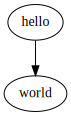

In [17]:
# test graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz
d = graphviz.Digraph()
d.edge('hello','world')
d

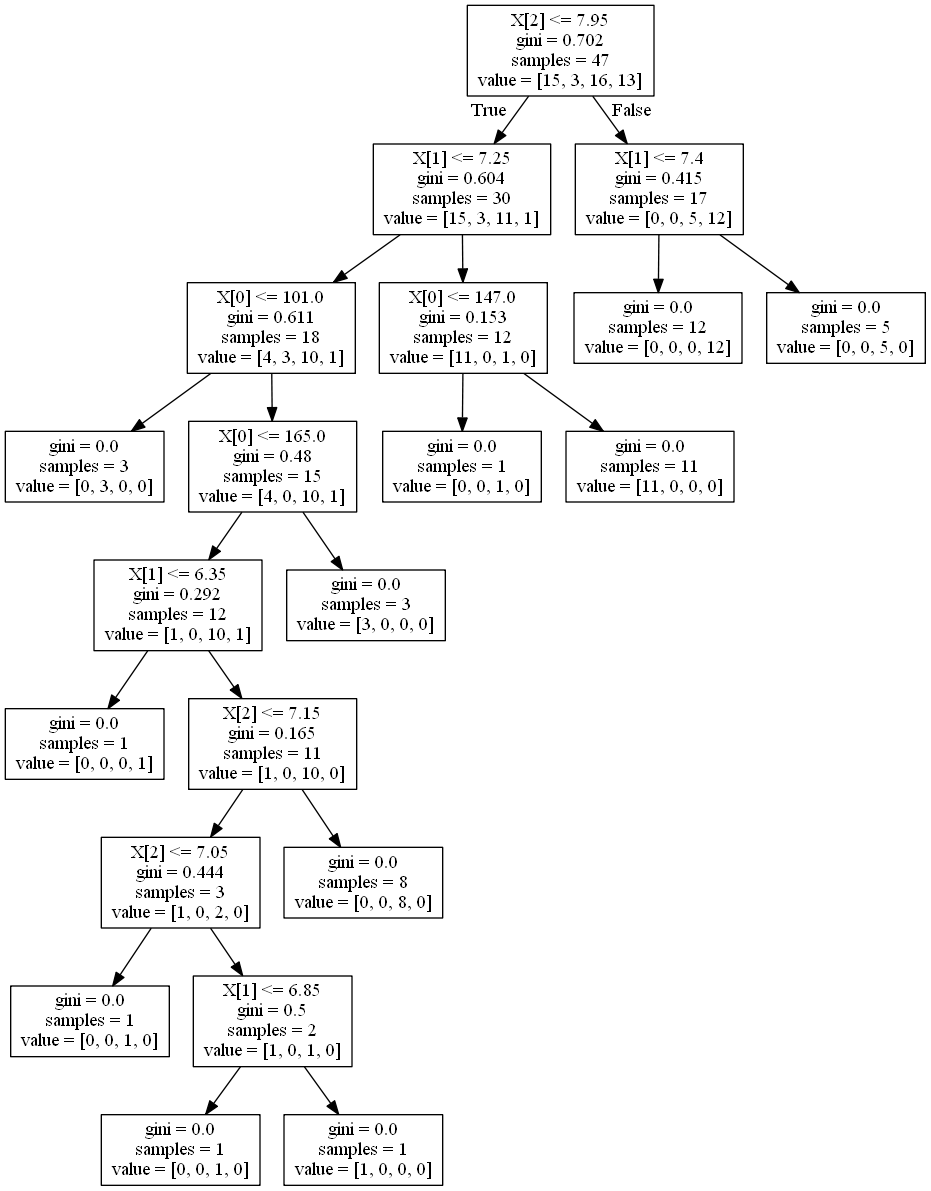

In [18]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [19]:
# Prediksi data baru

predictions=classifier.predict([[100, 6.3, 8.5]]) # Buah dengan massa 100 gr, lebar 6.3 cm dan tinggi 8.5cm
print(predictions)
print(lookup_fruit_name[predictions[0]])

[4]
lemon


## KNN Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
knn.score(X_test, y_test)

0.6666666666666666

In [23]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
#     print(X_mat)
#     print('-'*10)
#     print(X_mat[:, 0])
#     print('-'*10)
#     print(y_mat)
#     print('-'*10)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()


<IPython.core.display.Javascript object>


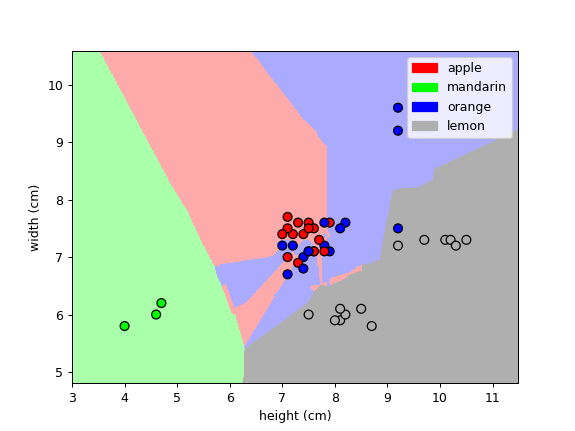

In [24]:
plot_fruit_knn(X_train, y_train, 3, 'uniform') # plot untuk knn = 3

<IPython.core.display.Javascript object>


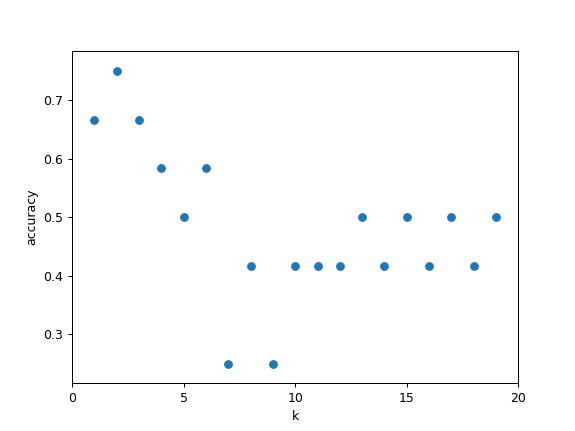

In [25]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [26]:
# Prediksi data baru

predictions=classifier.predict([[100, 6.3, 8.5]]) # Buah dengan massa 100 gr, lebar 6.3 cm dan tinggi 8.5cm
print(predictions)
print(lookup_fruit_name[predictions[0]])

[4]
lemon
